In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train1 = pd.read_csv("/content/drive/MyDrive/Deep Learning/XY_train_0.85.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Y_train1 = train1.iloc[:, 5]
X_train1 = train1.iloc[:, 0:5]

In [5]:
test1 = pd.read_csv("/content/drive/MyDrive/Deep Learning/XY_test_0.85.csv")

In [6]:
Y_test1 = test1.iloc[:, 5]
X_test1 = test1.iloc[:, 0:5]

In [7]:
Y_test1.head()

0    3.453
1    3.640
2    4.751
3    8.573
4    8.973
Name: y-test, dtype: float64

In [8]:
X_test1.head()

,melting,density,k,Cp,Latent
0,27.451,1232.9,0.540,3051.0,156.818
1,32.200,1424.0,0.499,3041.2,153.542
2,26.749,1053.4,0.219,753.6,152.280
3,29.374,966.9,0.343,2245.1,208.504
4,30.171,1358.8,0.556,2223.1,217.586


In [9]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_train1)
#X_train1 = scaler.transform(X_train1)

In [10]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_test1)
#X_test1 = scaler.transform(X_test1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.model_selection import RandomizedSearchCV

In [13]:
# Extra Trees regression
from sklearn.ensemble import ExtraTreesRegressor
model_trees = ExtraTreesRegressor()

In [14]:
n_estimator = [50,100,150,200,250]
max_depth =[10,15,20,25,30]
min_samples_leaf= [1,3,5,8,11]
min_samples_split= [2,4,6,8,10]

In [15]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimator,
                       "max_depth":max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    }

In [16]:
# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=model_trees,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'r2',
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [17]:
#model_trees_best= random_cv.fit(X_train1,Y_train1)

In [18]:
#model_trees_best.best_estimator_

In [19]:
#model_trees_best.best_score_

In [20]:
# model1 = model_trees_best  

In [21]:
from sklearn import ensemble
model1 = ensemble.ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=15, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=4, min_weight_fraction_leaf=0.0,
                    n_estimators=150, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [22]:
model1.fit(X_train1,Y_train1)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=15, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=4, min_weight_fraction_leaf=0.0,
                    n_estimators=150, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [23]:
model1.score(X_train1,Y_train1)

0.996857636419706

In [24]:
model1.score(X_test1,Y_test1)

0.9388666710286114

In [25]:
y_pred = model1.predict(X_test1)

In [26]:
count = 0
for i in range(len(Y_test1)):
  if abs(y_pred[i]-Y_test1.iloc[i]) <=0.5:
    count += 1

count

50

In [27]:
y_pred

array([ 3.57463667,  3.68484667,  5.29727111,  9.5146471 ,  8.03808392,
        3.48590111,  5.25064111,  3.79970056, 11.04875222,  3.66072556,
        4.22341333,  5.27635206,  3.77226095,  6.98016333,  3.58979667,
        4.13616222,  4.19436278,  7.30328667,  3.17646333,  8.11920841,
        7.9106054 ,  5.38953667,  4.41404778,  3.97821   ,  7.55169778,
        3.70543389,  3.27953444,  4.74092111,  8.25713668,  5.53118111,
        7.86979153,  3.51627778, 10.21040789,  8.25383328,  5.29248302,
        3.66326444,  4.52834033,  4.03711056,  7.56389556,  3.70281667,
        3.56940778,  5.71364444,  4.09399833,  4.00289422, 11.13814905,
        5.86528889,  6.79244333,  9.01061111,  3.21011778,  3.81756762,
        3.49259556,  8.79563667,  5.96535611, 11.10835351,  3.54546   ,
        8.10614333, 12.10694167,  6.24712556,  3.30131267,  9.23732589,
        6.85550115, 10.29748611,  4.15387429,  5.12678667,  7.121553  ,
        6.87811111,  4.30562056,  5.40916556,  3.85322734,  6.96

In [28]:
import sklearn.metrics as sm
y_test = Y_test1
y_test_pred = y_pred
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Regressor model performance:
Mean absolute error(MAE) = 0.42
Mean squared error(MSE) = 0.41
Median absolute error = 0.18
Explain variance score = 0.94
R2 score = 0.94


In [29]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model1, X = X_train1, y = Y_train1, cv = 5)
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))

Accuracy:92.50 %
Standard Deviation:1.58 %


In [30]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# create model
model = model1
# evaluate model
scores = cross_val_score(model, X= X_train1, y= Y_train1, cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores),std(scores)))

Accuracy: 0.929 (0.016)


In [31]:
print(min(scores))

0.8978877543906679


In [32]:
print(mean(scores))

0.9287530564382791


In [33]:
print(max(scores))

0.9544491136298127


In [34]:
print(scores)

[0.95109093 0.90211426 0.89788775 0.95444911 0.93191319 0.9261884
 0.93636832 0.92919653 0.92218612 0.9416621  0.94126258 0.91077299
 0.93031474 0.92435207 0.93153674]


In [35]:
#data2 = pd.read_csv("/content/drive/MyDrive/Deep Learning/Results.csv", index_col= "ID")
#data2.head()

In [36]:
#data2 = pd.DataFrame(y_test_pred, y_test)

In [37]:
#data2.to_csv('/content/drive/MyDrive/Deep Learning/Results1.csv')

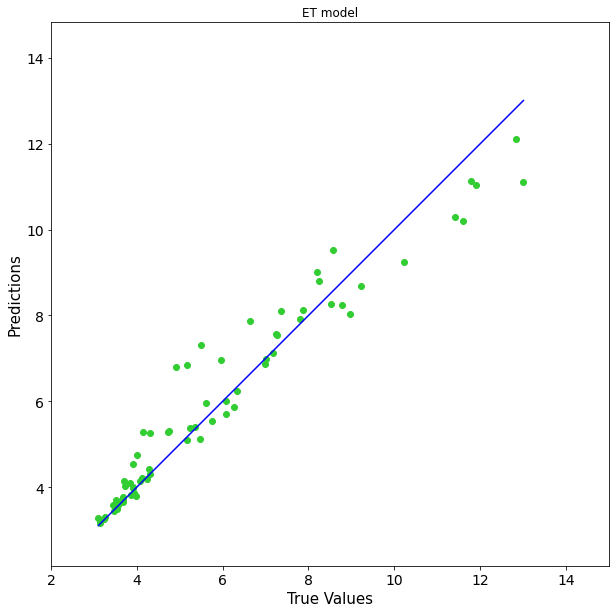

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='limegreen')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("ET model")
plt.xlim(2, 15)
plt.ylim(2, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.savefig("ET_model.eps")